<a href="https://colab.research.google.com/github/Devanshi0510/TRINIT_DEVIL_ML/blob/master/TRI_NIT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
from sklearn import *


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
path = "/content/drive/MyDrive/Crop_recommendation.csv"
df = pd.read_csv(path)

In [4]:
df.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.isnull().sum() #no missing data

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
crop= pd.pivot_table(df,index=['label'],aggfunc='mean')
crop

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


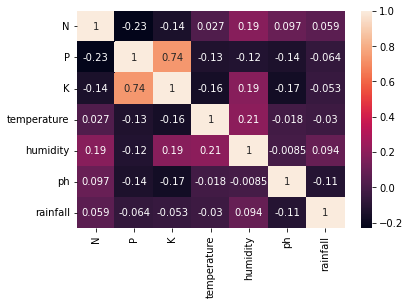

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape

(1760, 7)

In [14]:
X_test.shape

(440, 7)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[-1.21167434,  0.39395746, -0.65288957, ..., -1.84911256,
        -0.16269636,  0.98395591],
       [-0.56502346,  0.36344097, -0.45323262, ..., -0.31423162,
         1.62719974, -0.59749546],
       [ 1.69825463, -0.39947123, -0.61295818, ...,  0.38331648,
        -0.13954484, -0.63452677],
       ...,
       [-0.59196724, -0.58257016, -0.43326692, ..., -0.7721006 ,
        -0.25721237, -0.2769898 ],
       [-0.78057375, -1.10135045, -0.43326692, ..., -1.07174139,
        -2.25601785, -0.09046176],
       [ 1.29409783, -1.46754831, -0.01398733, ...,  0.59475278,
         0.23624554, -0.96350625]])

In [17]:
# Without cross Validation 

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=20, random_state=0)
RFC.fit(X_train,y_train)

predicted_values = RFC.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
print("Random Forest Classifier's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Classifier's Accuracy is:  0.9977272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        25
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        12
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        26
        jute       0.93      1.00      0.97        14
 kidneybeans       1.00      1.00      1.00        15
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        15
      orange       1.

In [19]:
# With Cross Validation

In [20]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, grid_search.predict(X_test)))


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9977272727272727


In [24]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

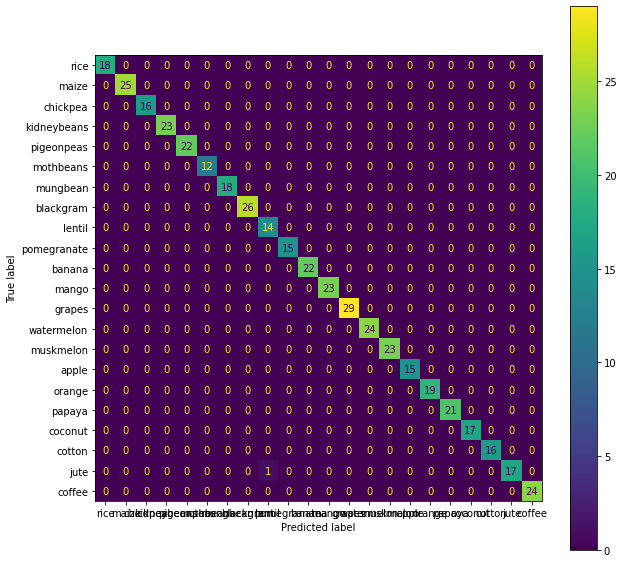

In [26]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(grid_search,X_test,y_test,
                      values_format='d',
    display_labels=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],ax=ax)

In [49]:
input_data =X_test
input_data_np = np.asarray(input_data, dtype=float)
# input_data_np_reshaped = input_data_np.reshape(1,7)
pred = grid_search.predict(input_data_np)
print(pred.tolist())

['coffee', 'chickpea', 'mango', 'pomegranate', 'jute', 'mango', 'mango', 'apple', 'lentil', 'rice', 'mungbean', 'mango', 'apple', 'chickpea', 'mungbean', 'banana', 'coconut', 'lentil', 'grapes', 'jute', 'coffee', 'kidneybeans', 'banana', 'watermelon', 'maize', 'cotton', 'grapes', 'watermelon', 'mothbeans', 'pigeonpeas', 'mungbean', 'lentil', 'coffee', 'pigeonpeas', 'maize', 'watermelon', 'coconut', 'orange', 'lentil', 'orange', 'grapes', 'pigeonpeas', 'watermelon', 'coconut', 'muskmelon', 'cotton', 'maize', 'lentil', 'chickpea', 'apple', 'maize', 'mango', 'chickpea', 'pigeonpeas', 'maize', 'jute', 'coffee', 'grapes', 'coconut', 'rice', 'blackgram', 'pigeonpeas', 'cotton', 'chickpea', 'watermelon', 'mango', 'kidneybeans', 'chickpea', 'grapes', 'mungbean', 'orange', 'cotton', 'mothbeans', 'cotton', 'lentil', 'papaya', 'mothbeans', 'banana', 'coconut', 'maize', 'apple', 'mothbeans', 'mothbeans', 'lentil', 'mungbean', 'grapes', 'chickpea', 'mungbean', 'banana', 'pigeonpeas', 'chickpea', 'g

In [48]:
y_test.tolist()

['coffee',
 'chickpea',
 'mango',
 'pomegranate',
 'jute',
 'mango',
 'mango',
 'apple',
 'lentil',
 'rice',
 'mungbean',
 'mango',
 'apple',
 'chickpea',
 'mungbean',
 'banana',
 'coconut',
 'lentil',
 'grapes',
 'rice',
 'coffee',
 'kidneybeans',
 'banana',
 'watermelon',
 'maize',
 'cotton',
 'grapes',
 'watermelon',
 'mothbeans',
 'pigeonpeas',
 'mungbean',
 'lentil',
 'coffee',
 'pigeonpeas',
 'maize',
 'watermelon',
 'coconut',
 'orange',
 'lentil',
 'orange',
 'grapes',
 'pigeonpeas',
 'watermelon',
 'coconut',
 'muskmelon',
 'cotton',
 'maize',
 'lentil',
 'chickpea',
 'apple',
 'maize',
 'mango',
 'chickpea',
 'pigeonpeas',
 'maize',
 'jute',
 'coffee',
 'grapes',
 'coconut',
 'rice',
 'blackgram',
 'pigeonpeas',
 'cotton',
 'chickpea',
 'watermelon',
 'mango',
 'kidneybeans',
 'chickpea',
 'grapes',
 'mungbean',
 'orange',
 'cotton',
 'mothbeans',
 'cotton',
 'lentil',
 'papaya',
 'mothbeans',
 'banana',
 'coconut',
 'maize',
 'apple',
 'mothbeans',
 'mothbeans',
 'lentil',
 

In [50]:
X_test

array([[ 1.34798541, -0.67411962, -0.43326692, ..., -0.08453135,
         0.51530957,  0.976674  ],
       [-0.53807967,  0.51602341,  0.58498351, ..., -2.57078039,
         0.03032845, -0.25589146],
       [-0.53807967, -1.00980099, -0.35340414, ..., -0.78918621,
        -0.34463238, -0.23020569],
       ...,
       [ 1.85991735, -1.40651533, -0.01398733, ...,  0.51359355,
         0.24253408, -0.89915456],
       [-0.32252937,  2.59114459,  3.10066106, ...,  0.4819078 ,
        -0.09215332, -0.54122419],
       [-0.53807967, -0.15533933, -0.05391872, ...,  0.95674943,
         0.12318223,  0.50691047]])

In [52]:
input_data =('85',	'58',	'41',	'21.77046169'	,'80.31964408',	'7.038096361'	,'226.6555374')
input_data_np = np.asarray(input_data, dtype=float)
input_data_np_reshaped = scaler.transform(input_data_np.reshape(1,7))
pred = grid_search.predict(input_data_np_reshaped)
print(pred.tolist())

['rice']
